In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wuvars.data.photometry import load_wserv_v2, group_wserv_v2

In [2]:


spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"
period_sheet_ic = pd.read_excel(
    os.path.join(spreadsheet_dir, "IC_source_properties_periods_inspected.xlsx")
)


In [3]:
period_sheet_ic

,index,SOURCEID,shortname,A/S/C,RA_deg,DE_deg,J_mag,H_mag,K_mag,Teff,...,per_amp_H,per_fap_H,period_K,per_amp_K,per_fap_K,Periodic?,Period,Amp,Color? (dK/dJ),Notes
0,0,44989782490916,ic_000C_M5.2_Q2,C,55.756031,32.037304,14.454513,13.744124,13.216278,3091.25,...,0.010793,1.802512e-04,0.134680,0.006240,4.064202e-02,NaN,NaN,NaN,NaN,NaN
1,1,44989782490222,ic_001A_M4.5_Q1JH,A,55.833059,32.044767,13.771909,13.212897,12.839353,3197.50,...,0.005396,4.106724e-02,0.069640,0.005448,9.408855e-02,NaN,NaN,NaN,NaN,NaN
2,2,44989782463184,ic_002A_L0.0_Q1HK,A,55.843810,32.304850,18.559807,17.688578,16.840767,2173.00,...,0.042379,4.830106e-02,0.089929,0.047603,3.632186e-03,NaN,NaN,NaN,NaN,NaN
3,3,44989782490103,ic_003C_M4.5_Q2,C,55.848181,32.207171,13.972918,13.187710,12.678646,3197.50,...,0.048473,9.930195e-03,0.104267,0.031342,4.569703e-03,NaN,NaN,NaN,NaN,NaN
4,4,44989782446669,ic_004A_M5.0_Q1J,A,55.856166,31.921242,15.735189,13.745332,12.486935,3125.00,...,0.008280,8.937975e-03,0.259241,0.006090,1.177880e-02,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,44989782458863,ic_220A_M5.8_Q0,A,56.370865,32.298646,15.459792,14.520049,13.770371,3023.75,...,0.016942,8.213335e-02,0.050997,0.014812,1.095018e-01,NaN,NaN,NaN,NaN,NaN
221,221,44989782450561,ic_221C_M5.5_Q2,C,56.373853,31.988792,14.410278,13.481464,12.805416,3057.50,...,0.015537,3.228846e-03,0.498204,0.022314,4.823185e-02,NaN,NaN,NaN,NaN,NaN
222,222,44989782494425,ic_222C_M6.5_Q2,C,56.381006,32.208004,16.786983,15.939050,15.271194,2935.00,...,0.011869,7.246108e-02,0.075129,0.012423,1.809545e-03,NaN,NaN,NaN,NaN,NaN
223,223,44989782459277,ic_223S_M4.5_Q1JHK,S,56.399668,32.244880,13.799328,12.962640,12.418676,3197.50,...,0.019392,9.428960e-07,0.499648,0.075383,5.875350e-07,N,NaN,NaN,NaN,NaN


In [4]:
periods_ic = period_sheet_ic[period_sheet_ic["Periodic?"] == "Y"]
weak_periods_ic = period_sheet_ic[period_sheet_ic["Periodic?"] == "Yw"]
Yf_ic = period_sheet_ic[period_sheet_ic['Periodic?'] == 'Yf']
Qf_ic = period_sheet_ic[period_sheet_ic['Periodic?'] == '?f']

In [191]:
len(periods_ic['Period']), len(weak_periods_ic), len(Yf_ic), len(Qf_ic)

(14, 3, 9, 4)

In [192]:
14/224, 30/224

(0.0625, 0.13392857142857142)

In [193]:
good_periods_ic = period_sheet_ic[(period_sheet_ic["Periodic?"] == "Y") | (period_sheet_ic["Periodic?"] == "Yw")]


Text(0, 0.5, 'Amplitude (mag)')

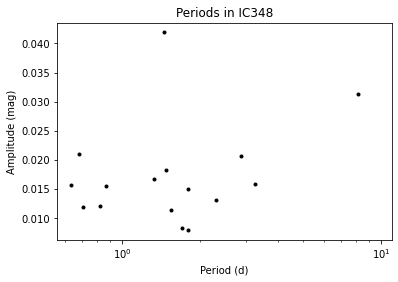

In [38]:
plt.plot(good_periods_ic['Period'], good_periods_ic['Amp'], 'k.')
plt.semilogx()
plt.xlim(None, 11)
plt.title("Periods in IC348")
plt.xlabel("Period (d)")
plt.ylabel("Amplitude (mag)")

Text(0, 0.5, 'Amplitude (mag)')

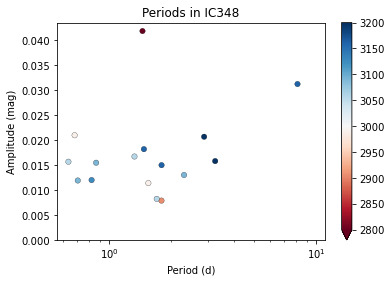

In [47]:
plt.scatter(
    good_periods_ic['Period'], 
    good_periods_ic['Amp'], 
    c=good_periods_ic['Teff'],
    cmap='RdBu',
    s=30, 
    ec='k',
    linewidths=0.25,    
    vmin=2800,
    vmax=3200
)
plt.colorbar( extend='min')
plt.semilogx()
plt.xlim(None, 11)
plt.ylim(0, None)
plt.title("Periods in IC348")
plt.xlabel("Period (d)")
plt.ylabel("Amplitude (mag)")

Text(0, 0.5, 'Period (d)')

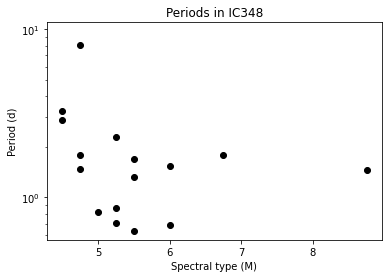

In [52]:
plt.plot(good_periods_ic['SpT'], good_periods_ic['Period'], 'ko')
plt.semilogy()
plt.ylim(None, 11)
plt.title("Periods in IC348")
plt.xlabel("Spectral type (M)")
plt.ylabel("Period (d)")
# plt.ylabel("Amplitude (mag)")

Text(0, 0.5, 'Amplitude (mag)')

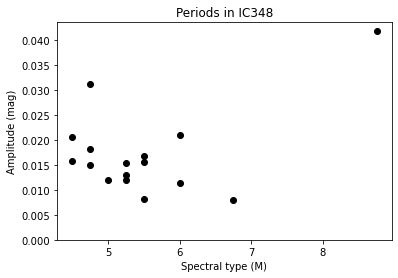

In [55]:
plt.plot(good_periods_ic['SpT'], good_periods_ic['Amp'], 'ko')
# plt.semilogy()
plt.ylim(0, None)
plt.title("Periods in IC348")
plt.xlabel("Spectral type (M)")
# plt.ylabel("Period (d)")
plt.ylabel("Amplitude (mag)")

In [62]:
dat7 = group_wserv_v2(load_wserv_v2(7))

Loading WSERV7 photometry data... DONE (elapsed time: 0.22s)


In [58]:
sid = 44508746098400

In [63]:
star_dat = dat7.groups[dat7.groups.keys["SOURCEID"] == sid]


In [66]:
from astropy.timeseries import LombScargle
from wuvars.analysis.periods import f_max, f_min, N_eval
freq = np.linspace(f_min, f_max, N_eval)

band = 'K'
mask = star_dat[f"{band}APERMAG3"].mask
times = star_dat["MEANMJDOBS"][~mask]
mags = star_dat[f"{band}APERMAG3"][~mask]
errs = star_dat[f"{band}APERMAG3ERR"][~mask]


ls = LombScargle(times, mags, dy=errs)
power = ls.power(freq, assume_regular_frequency=True).value

min_freq = 1 / 100
power[freq < min_freq] = 0
power[np.abs(freq-1) < 0.01] = 0

powermax = np.nanmax(power)
fmax = freq[np.nanargmax(power)]
fap = ls.false_alarm_probability(np.nanmax(power)).value

amp = np.sqrt(np.sum(ls.model_parameters(fmax)[1:3]**2))

In [67]:
ls.model_parameters(fmax)

<Quantity [ 0.00102116,  0.02203608, -0.02427908]>

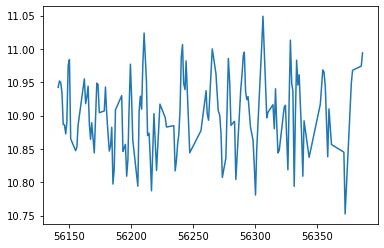

In [68]:
plt.plot(times, mags)


In [6]:
spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"
period_sheet_ngc = pd.read_excel(
    os.path.join(spreadsheet_dir, "NGC_source_properties_periods_inspected.xlsx")
)


In [180]:
period_sheet_ngc

,index,SOURCEID,shortname,A/S/C,RA_deg,DE_deg,J_mag,H_mag,K_mag,Teff,...,period_H,per_amp_H,per_fap_H,period_K,per_amp_K,per_fap_K,Periodic?,Period,Amp,Color? (dK/dJ)
0,0,44508746126979,ngc_000C_M8.2_Q2,C,52.063295,31.289946,16.515057,15.824038,15.121696,2632.50,...,0.101090,0.011919,7.495559e-02,0.071147,0.013771,2.908514e-03,NaN,NaN,NaN,NaN
1,1,44508746098759,ngc_001A_M5.8_Q0,A,52.118393,31.274236,14.590139,14.066149,13.646991,3023.75,...,0.990095,0.011002,3.609546e-08,0.499149,0.005850,1.117314e-02,N,NaN,NaN,NaN
2,2,44508746098738,ngc_002A_M9.5_Q1K,A,52.123932,31.255684,18.758718,18.027431,17.257589,2286.50,...,0.055886,0.049905,9.439145e-02,0.246913,0.041818,3.034890e-01,NaN,NaN,NaN,NaN
3,3,44508746098719,ngc_003A_M8.0_Q0,A,52.129572,31.284470,17.055401,15.300561,13.979826,2710.00,...,0.928243,0.018484,7.202387e-22,0.928070,0.010638,2.698214e-16,Yf,0.930000,NaN,NaN
4,4,44508746098671,ngc_004C_M8.0_Q2,C,52.145272,31.267916,17.553093,16.520367,15.212504,2710.00,...,0.498478,0.024596,1.225322e-04,0.500950,0.017558,8.732863e-08,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,44508746120771,ngc_098C_M6.5_Q2,C,52.406844,31.046975,14.656425,14.189074,13.771172,2935.00,...,78.739829,0.005624,5.409196e-04,0.111296,0.005609,1.028163e-02,NaN,NaN,NaN,NaN
99,99,44508746117684,ngc_099C_M6.8_Q2,C,52.407192,31.367371,13.862842,13.378143,12.921450,2907.50,...,1.584528,0.013571,1.103314e-21,1.585031,0.009512,2.855974e-16,Y,1.584863,0.012147,0.712046
100,100,44508746117813,ngc_100C_M7.2_Q2,C,52.433935,31.329824,17.636654,16.508480,15.092105,2837.50,...,0.983570,0.050798,9.298578e-06,0.500023,0.050526,2.916361e-08,N,NaN,NaN,NaN
101,101,44508746117885,ngc_101C_M4.5_Q2,C,52.443333,31.344286,12.312290,11.747795,11.450674,3197.50,...,0.253729,0.004904,2.237962e-02,0.060571,0.004878,2.702416e-02,N,NaN,NaN,NaN


In [181]:
periods_ngc = period_sheet_ngc[period_sheet_ngc["Periodic?"] == "Y"]
weak_periods_ngc = period_sheet_ngc[period_sheet_ngc["Periodic?"] == "Yw"]
Yf_ngc = period_sheet_ngc[period_sheet_ngc['Periodic?'] == 'Yf']
Qf_ngc = period_sheet_ngc[period_sheet_ngc['Periodic?'] == '?f']

In [79]:
len(periods_ngc['Period']), len(weak_periods_ngc), len(Yf_ngc), len(Qf_ngc)

(13, 1, 15, 0)

In [182]:
good_periods_ngc = period_sheet_ngc[(period_sheet_ngc["Periodic?"] == "Y") | (period_sheet_ngc["Periodic?"] == "Yw")]


Text(0, 0.5, 'Amplitude (mag)')

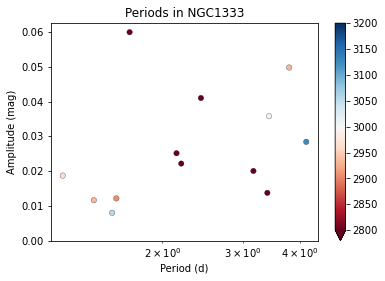

In [81]:
plt.scatter(
    good_periods_ngc['Period'], 
    good_periods_ngc['Amp'], 
    c=good_periods_ngc['Teff'],
    cmap='RdBu',
    s=30, 
    ec='k',
    linewidths=0.25,    
    vmin=2800,
    vmax=3200
)
plt.colorbar( extend='min')
plt.semilogx()
# plt.xlim(None, 11)
plt.ylim(0, None)
plt.title("Periods in NGC1333")
plt.xlabel("Period (d)")
plt.ylabel("Amplitude (mag)")

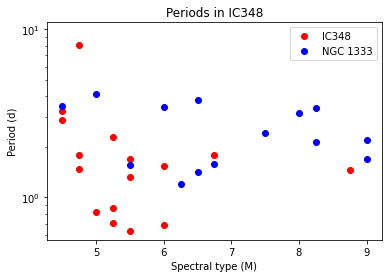

In [86]:
plt.plot(good_periods_ic['SpT'], good_periods_ic['Period'], 'ro', label="IC348")
plt.plot(good_periods_ngc['SpT'], good_periods_ngc['Period'], 'bo', label="NGC 1333")

plt.semilogy()
plt.ylim(None, 11)
plt.title("Periods in IC348")
plt.xlabel("Spectral type (M)")
plt.ylabel("Period (d)")
# plt.ylabel("Amplitude (mag)")
         
plt.legend()

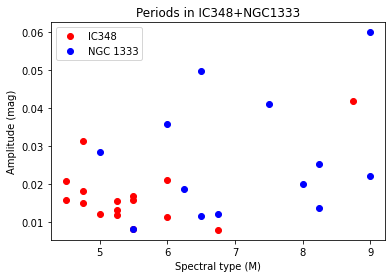

In [98]:
plt.plot(good_periods_ic['SpT'], good_periods_ic['Amp'], 'ro', label="IC348")
plt.plot(good_periods_ngc['SpT'], good_periods_ngc['Amp'], 'bo', label="NGC 1333")

# plt.semilogy()
# plt.ylim(None, 11)
plt.title("Periods in IC348+NGC1333")
plt.xlabel("Spectral type (M)")
plt.ylabel("Amplitude (mag)")
# plt.ylabel("Amplitude (mag)")
         
plt.legend()

In [7]:
spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"
period_sheet_onc = pd.read_excel(
    os.path.join(spreadsheet_dir, "ONC_source_properties_periods_inspected.xlsx")
)


In [185]:
period_sheet_onc

,index,SOURCEID,shortname,A/S/C,RA_deg,DE_deg,J_mag,H_mag,K_mag,Teff,...,period_H,per_amp_H,per_fap_H,period_K,per_amp_K,per_fap_K,Periodic?,Period,Amp,Color? (dK/dJ)
0,0,44199508515375,onc_000A_M5.3_Q0,A,83.617579,-5.444361,13.512184,12.871636,12.502649,3084,...,0.332401,0.010645,5.172381e-05,0.498527,0.012165,1.319290e-08,N,NaN,NaN,NaN
1,1,44199508515199,onc_001C_M5.4_Q2,C,83.625008,-5.421490,13.343151,12.743423,12.434407,3069,...,2.332624,0.008780,7.424214e-03,0.141829,0.008006,3.519723e-03,NaN,NaN,NaN,NaN
2,2,44199508515224,onc_002C_M5.7_Q2,C,83.622434,-5.431079,13.886322,13.290879,12.980474,3031,...,0.044995,0.007473,6.947329e-03,0.086732,0.006976,2.302551e-02,NaN,NaN,NaN,NaN
3,3,44199508475055,onc_003C_M7.1_Q2,C,83.599881,-5.476321,13.993050,13.421385,13.030751,2861,...,0.499798,0.007454,4.758744e-03,0.499149,0.013671,2.296788e-08,N,NaN,NaN,NaN
4,4,44199508514291,onc_004C_M6.1_Q2,C,83.685045,-5.435031,13.006086,12.412901,12.054646,2978,...,1.499694,0.018994,6.842923e-17,1.499694,0.014510,4.766354e-08,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,331,44199508565017,onc_331C_M6.7_Q2,C,83.887035,-5.655317,14.448968,13.804473,13.451404,2918,...,0.497857,0.009183,1.999787e-05,0.499948,0.009218,2.714728e-05,NaN,NaN,NaN,NaN
332,332,44199508565887,onc_332C_M4.6_Q2,C,83.869910,-5.692783,13.523592,12.810340,12.545029,3183,...,2.009638,0.008675,1.478241e-03,0.082914,0.008013,5.671041e-03,NaN,NaN,NaN,NaN
333,333,44199508565551,onc_333C_M4.8_Q2,C,83.927789,-5.678397,13.456958,12.658654,12.293901,3157,...,1.804070,0.011553,8.323978e-13,0.120695,0.007210,8.771719e-03,Yf,1.8,0.012,NaN
334,334,44199508565550,onc_334C_M7.2_Q2,C,83.927966,-5.676501,14.957703,14.415291,14.054878,2840,...,0.043213,0.008791,2.138600e-03,0.047184,0.007592,2.417467e-02,NaN,NaN,NaN,NaN


In [9]:
flags = ['Y', 'Yw', 'Yf', '?f', 'N', 'YfY', '?fY', 'YfYw', '?fYw', "YfN", "?fN"]

print (f"ONC:  ({len(period_sheet_onc)} objects inspected)")
for flag in flags:
    print(f"{flag:2s}:", np.sum(period_sheet_onc["Periodic?"] == flag))
    
print (f"\nNGC 1333: ({len(period_sheet_ngc)} objects inspected)")
for flag in flags:
    print(f"{flag:2s}:", np.sum(period_sheet_ngc["Periodic?"] == flag))
    
print (f"\nIC 348: ({len(period_sheet_ic)} objects inspected)")
for flag in flags:
    print(f"{flag:2s}:", np.sum(period_sheet_ic["Periodic?"] == flag))
    
print("\nTotals:")
for flag in flags:
    flag_sum = np.sum(period_sheet_ic["Periodic?"] == flag) + np.sum(period_sheet_onc["Periodic?"] == flag) + np.sum(period_sheet_ngc["Periodic?"] == flag)
    flag_fraction = flag_sum / 664
    flag_percent = flag_fraction*100
    print(f"{flag:2s}: {flag_sum} ({flag_percent:.1f}%)")
    
print(f"\nof {len(period_sheet_ic)+len(period_sheet_ngc)+len(period_sheet_onc)} low-mass objects inspected")


ONC:  (336 objects inspected)
Y : 35
Yw: 7
Yf: 1
?f: 1
N : 38
YfY: 25
?fY: 10
YfYw: 0
?fYw: 0
YfN: 0
?fN: 2

NGC 1333: (103 objects inspected)
Y : 13
Yw: 1
Yf: 0
?f: 0
N : 20
YfY: 14
?fY: 0
YfYw: 1
?fYw: 0
YfN: 0
?fN: 0

IC 348: (225 objects inspected)
Y : 14
Yw: 3
Yf: 0
?f: 0
N : 23
YfY: 8
?fY: 0
YfYw: 0
?fYw: 0
YfN: 1
?fN: 4

Totals:
Y : 62 (9.3%)
Yw: 11 (1.7%)
Yf: 1 (0.2%)
?f: 1 (0.2%)
N : 81 (12.2%)
YfY: 47 (7.1%)
?fY: 10 (1.5%)
YfYw: 1 (0.2%)
?fYw: 0 (0.0%)
YfN: 1 (0.2%)
?fN: 6 (0.9%)

of 664 low-mass objects inspected


In [225]:
flags = ['Y', 'Yw', 'Yf', '?f', 'N']

SpT_bins = [4.5, 5.5, 7, 9]

# print (f"ONC:  ({len(period_sheet_onc)} objects inspected)")
# for flag in flags:
#     print(f"{flag:2s}:", np.sum(period_sheet_onc["Periodic?"] == flag))
    
# print (f"\nNGC 1333: ({len(period_sheet_ngc)} objects inspected)")
# for flag in flags:
#     print(f"{flag:2s}:", np.sum(period_sheet_ngc["Periodic?"] == flag))
    
# print (f"\nIC 348: ({len(period_sheet_ic)} objects inspected)")
# for flag in flags:
#     print(f"{flag:2s}:", np.sum(period_sheet_ic["Periodic?"] == flag))
    
print("\nTotals:")
print(f"\tAll", end='')

for i, bin_min in enumerate(SpT_bins):

    try:
        bin_max = SpT_bins[i+1]
        num_in_bin = (
            np.sum((period_sheet_ic['SpT'] >= bin_min) & (period_sheet_ic['SpT'] < bin_max)) + 
            np.sum((period_sheet_ngc['SpT'] >= bin_min) & (period_sheet_ngc['SpT'] < bin_max)) + 
            np.sum((period_sheet_onc['SpT'] >= bin_min) & (period_sheet_onc['SpT'] < bin_max))
        )
#         print(f"\t M{bin_min}-{bin_max} (n={num_in_bin})", end='')
        print(f"\t M{bin_min}-{bin_max-0.1} ", end='')
          
    except:
        pass

print("")
print(f"\t(n={664})", end='')
for i, bin_min in enumerate(SpT_bins):

    try:
        bin_max = SpT_bins[i+1]
        num_in_bin = (
            np.sum((period_sheet_ic['SpT'] >= bin_min) & (period_sheet_ic['SpT'] < bin_max)) + 
            np.sum((period_sheet_ngc['SpT'] >= bin_min) & (period_sheet_ngc['SpT'] < bin_max)) + 
            np.sum((period_sheet_onc['SpT'] >= bin_min) & (period_sheet_onc['SpT'] < bin_max))
        )
#         print(f"\t M{bin_min}-{bin_max} (n={num_in_bin})", end='')
        print(f"\t (n={num_in_bin})", end='')
          
    except:
        pass

print("")
for flag in flags:
    flag_sum = np.sum(period_sheet_ic["Periodic?"] == flag) + np.sum(period_sheet_onc["Periodic?"] == flag) + np.sum(period_sheet_ngc["Periodic?"] == flag)
    flag_fraction = flag_sum / 664
    flag_percent = flag_fraction*100
    print(f"{flag:2s}: {flag_sum} ({flag_percent:.1f}%)", end='')
    
    for i, bin_min in enumerate(SpT_bins):
        
        bin_max = SpT_bins[i+1]
        num_in_bin = (
            np.sum((period_sheet_ic['SpT'] >= bin_min) & (period_sheet_ic['SpT'] < bin_max)) + 
            np.sum((period_sheet_ngc['SpT'] >= bin_min) & (period_sheet_ngc['SpT'] < bin_max)) + 
            np.sum((period_sheet_onc['SpT'] >= bin_min) & (period_sheet_onc['SpT'] < bin_max))
        )
        flag_sum_in_bin = (
            np.sum((period_sheet_ic["Periodic?"] == flag) & (period_sheet_ic['SpT'] >= bin_min) & (period_sheet_ic['SpT'] < bin_max)) + 
            np.sum((period_sheet_onc["Periodic?"] == flag) & (period_sheet_onc['SpT'] >= bin_min) & (period_sheet_onc['SpT'] < bin_max)) + 
            np.sum((period_sheet_ngc["Periodic?"] == flag) & (period_sheet_ngc['SpT'] >= bin_min) & (period_sheet_ngc['SpT'] < bin_max))
        )
        flag_fraction = flag_sum_in_bin / num_in_bin
        flag_percent = flag_fraction*100
#         print(f"\t M{bin_min}-{bin_max} {flag_sum_in_bin:2d}/{num_in_bin} ({flag_percent:.1f}%)  ", end='')
        print(f"\t {flag_sum_in_bin:2d} ({flag_percent:.1f}%)  ", end='')
        
        if i==len(SpT_bins)-2:
            break
    print("")
    
print(f"\nof {len(period_sheet_ic)+len(period_sheet_ngc)+len(period_sheet_onc)} low-mass objects inspected")



Totals:
	All	 M4.5-5.4 	 M5.5-6.9 	 M7-8.9 
	(n=664)	 (n=237)	 (n=187)	 (n=187)
Y : 62 (9.3%)	 22 (9.3%)  	 16 (8.6%)  	 21 (11.2%)  
Yw: 11 (1.7%)	  4 (1.7%)  	  2 (1.1%)  	  5 (2.7%)  
Yf: 50 (7.5%)	 21 (8.9%)  	 12 (6.4%)  	 16 (8.6%)  
?f: 17 (2.6%)	 11 (4.6%)  	  2 (1.1%)  	  4 (2.1%)  
N : 81 (12.2%)	 32 (13.5%)  	 28 (15.0%)  	 19 (10.2%)  

of 664 low-mass objects inspected


In [214]:
good_periods_onc = period_sheet_onc[(period_sheet_onc["Periodic?"] == "Y") | (period_sheet_onc["Periodic?"] == "Yw")]


Text(0, 0.5, 'Amplitude (mag)')

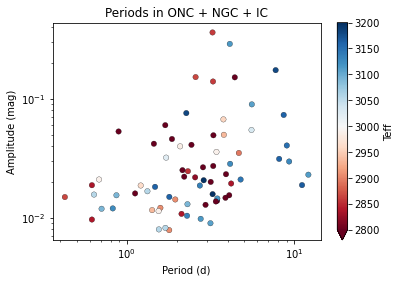

In [199]:
plt.scatter(
    good_periods_onc['Period'], 
    good_periods_onc['Amp'], 
    c=good_periods_onc['Teff'],
    cmap='RdBu',
    s=30, 
    ec='k',
    linewidths=0.25,    
    vmin=2800,
    vmax=3200
)

plt.scatter(
    good_periods_ngc['Period'], 
    good_periods_ngc['Amp'], 
    c=good_periods_ngc['Teff'],
    cmap='RdBu',
    s=30, 
    ec='k',
    linewidths=0.25,    
    vmin=2800,
    vmax=3200
)

plt.scatter(
    good_periods_ic['Period'], 
    good_periods_ic['Amp'], 
    c=good_periods_ic['Teff'],
    cmap='RdBu',
    s=30, 
    ec='k',
    linewidths=0.25,    
    vmin=2800,
    vmax=3200
)


plt.colorbar(label='Teff', extend='min')
plt.semilogx()
# plt.xlim(None, 11)
# plt.ylim(0, None)
plt.semilogy()
plt.title("Periods in ONC + NGC + IC")
plt.xlabel("Period (d)")
plt.ylabel("Amplitude (mag)")

In [ ]:
plt.scatter(
    good_periods_onc['Period'], 
    good_periods_onc['Amp'], 
    c=good_periods_onc['Teff'],
    cmap='RdBu',
    s=30, 
    ec='k',
    linewidths=0.25,    
    vmin=2800,
    vmax=3200
)
plt.colorbar( extend='min')
plt.semilogx()
# plt.xlim(None, 11)
plt.ylim(0, None)
plt.title("Periods in ONC")
plt.xlabel("Period (d)")
plt.ylabel("Amplitude (mag)")

Text(0, 0.5, 'Amplitude (mag)')

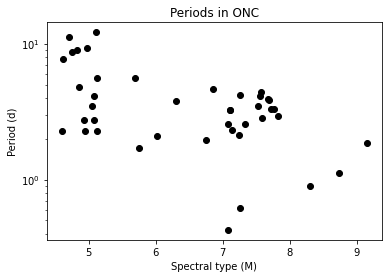

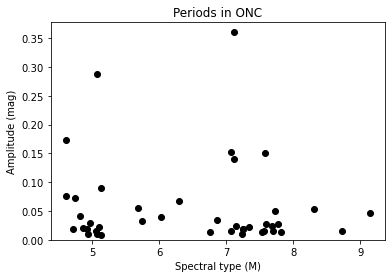

In [102]:
plt.plot(good_periods_onc['SpT'], good_periods_onc['Period'], 'ko')
plt.semilogy()
# plt.ylim(None, 11)
plt.title("Periods in ONC")
plt.xlabel("Spectral type (M)")
plt.ylabel("Period (d)")
# plt.ylabel("Amplitude (mag)")

plt.figure()
plt.plot(good_periods_onc['SpT'], good_periods_onc['Amp'], 'ko')
# plt.semilogy()
plt.ylim(0, None)
plt.title("Periods in ONC")
plt.xlabel("Spectral type (M)")
# plt.ylabel("Period (d)")
plt.ylabel("Amplitude (mag)")

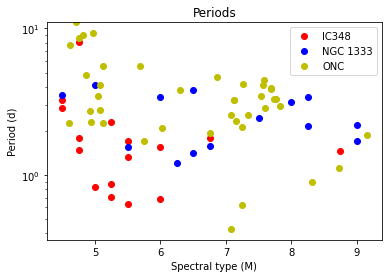

In [104]:
plt.plot(good_periods_ic['SpT'], good_periods_ic['Period'], 'ro', label="IC348")
plt.plot(good_periods_ngc['SpT'], good_periods_ngc['Period'], 'bo', label="NGC 1333")
plt.plot(good_periods_onc['SpT'], good_periods_onc['Period'], 'yo', label="ONC")

plt.semilogy()
plt.ylim(None, 11)
plt.title("Periods")
plt.xlabel("Spectral type (M)")
plt.ylabel("Period (d)")
# plt.ylabel("Amplitude (mag)")
         
plt.legend()

0 0 6


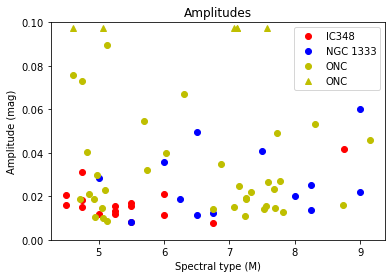

In [108]:
plt.plot(good_periods_ic['SpT'], good_periods_ic['Amp'], 'ro', label="IC348")
plt.plot(good_periods_ngc['SpT'], good_periods_ngc['Amp'], 'bo', label="NGC 1333")
plt.plot(good_periods_onc['SpT'], good_periods_onc['Amp'], 'yo', label="ONC")

gtr_ic = good_periods_ic['Amp'] >= 0.1
gtr_ngc = good_periods_ngc['Amp'] >= 0.1
gtr_onc = good_periods_onc['Amp'] >= 0.1

print(np.sum(gtr_ic), np.sum(gtr_ngc), np.sum(gtr_onc))

# plt.plot(good_periods_ic['SpT'][gtr_ic], good_periods_ic['Amp'], 'ro', label="IC348")
# plt.plot(good_periods_ngc['SpT'][gtr_ngc], good_periods_ngc['Amp'], 'bo', label="NGC 1333")
plt.plot(good_periods_onc['SpT'][gtr_onc], [0.0975]*len(good_periods_onc['Amp'][gtr_onc]), 'y^', label="ONC")


# plt.semilogy()
plt.ylim(0, 0.1)
plt.title("Amplitudes")
plt.xlabel("Spectral type (M)")
plt.ylabel("Amplitude (mag)")
# plt.ylabel("Amplitude (mag)")
         
plt.legend()

In [137]:
from wuvars.data import spreadsheet, photometry, quality_classes
from wuvars.plotting.lightcurve_helpers import orion_cmap
from wuvars.plotting.lightcurve import simple_phased_lc_scatter_gridspec
from wuvars.analysis.spectral_type_to_number import get_SpT_from_num


Loading WSERV5 photometry data... DONE (elapsed time: 0.25s)
Loading WSERV7 photometry data... DONE (elapsed time: 0.24s)
Loading WSERV8 photometry data... DONE (elapsed time: 0.29s)


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<string>:6: UserWarning: Warning: converting a masked element to nan.


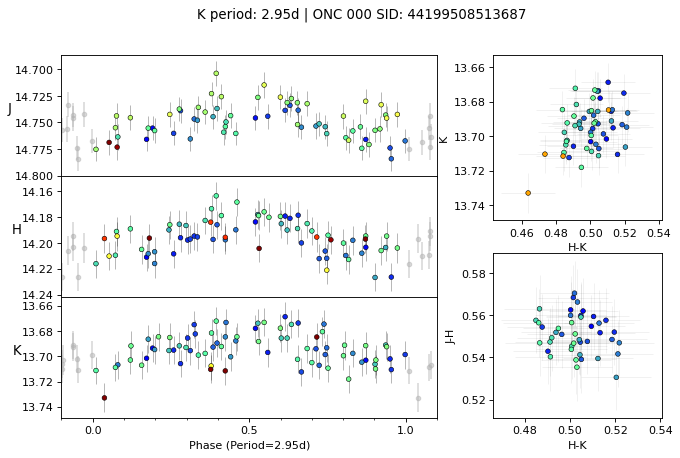

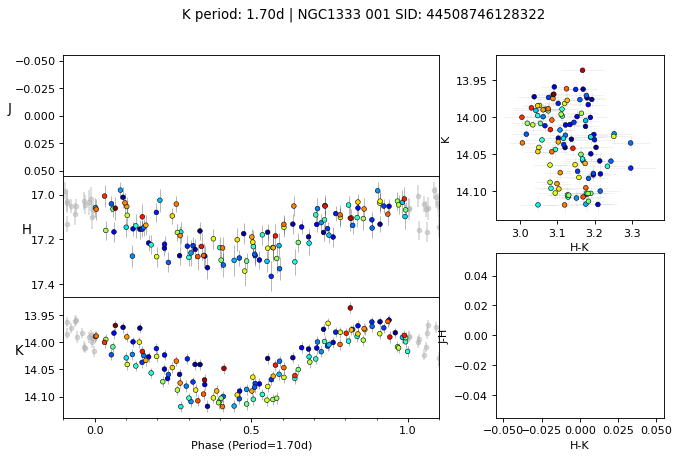

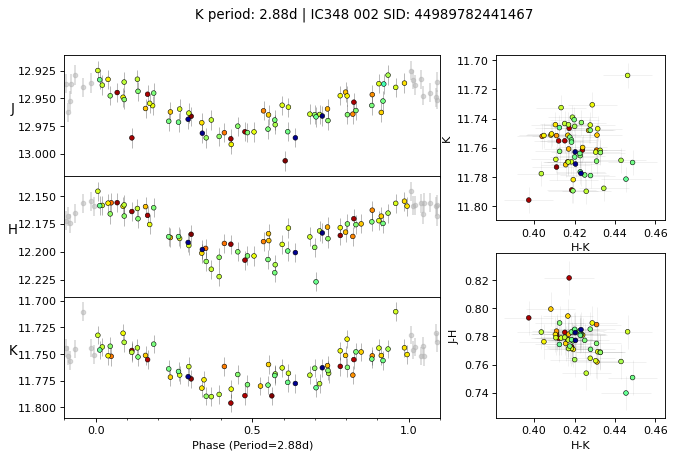

In [135]:
wservs = [5, 7, 8]
# datasets = [group_wserv_v2(load_wserv_v2(wserv)) for wserv in wservs]

onc = {}
ngc = {}
ic = {}
dicts = [onc, ngc, ic]

onc["dat"] = photometry.group_wserv_v2(photometry.load_wserv_v2(5))
onc["q"] = quality_classes.load_q(5)
onc["spread"] = spreadsheet.load_wserv_v2(5)
onc["cmap"] = orion_cmap

ngc["dat"] = photometry.group_wserv_v2(photometry.load_wserv_v2(7))
ngc["q"] = quality_classes.load_q(7)
ngc["spread"] = spreadsheet.load_wserv_v2(7)
ngc["cmap"] = "jet"

ic["dat"] = photometry.group_wserv_v2(photometry.load_wserv_v2(8))
ic["q"] = quality_classes.load_q(8)
ic["spread"] = spreadsheet.load_wserv_v2(8)
ic["cmap"] = "jet_r"

region_names = ["ONC", "NGC1333", "IC348"]
short_names = ["ONC", "NGC", "IC"]

bands = ["J", "H", "K"]
                           

#         plt.close(fig)        

In [194]:
for i, good_sheet in enumerate([good_periods_onc, good_periods_ngc, good_periods_ic]):
    
    if i!= 2:
        continue
    
    dat = dicts[i]['dat']
    name = region_names[i]
    
    periods = good_sheet['Period']
    sids = good_sheet['SOURCEID']
    SpTs = good_sheet['SpT'].values
    Teffs = good_sheet['Teff'].values
    
    indices = good_sheet['index'].values
    
    for j, (sid, period) in enumerate(zip(sids, periods)):
        
        if indices[j] != 18:
            continue
        print(i,j, indices[j])
        
        fig = simple_phased_lc_scatter_gridspec(
            dat, sid, period, cmap=dicts[i]["cmap"]
        )
        fig.suptitle(
            f"Period: {period:.2f}d  |  {name} {indices[j]:03d} SID: {sid}  |  SpT={get_SpT_from_num(SpTs[j])} / Teff={Teffs[j]}"
        )

        fig.savefig(
            os.path.join(
                'periodic', name, f"{indices[j]:03d}_folded_lc.png"
            ),
            bbox_inches="tight",
        )
        plt.close(fig)
    

2 1 18


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


In [148]:
good_sheet

,index,SOURCEID,shortname,A/S/C,RA_deg,DE_deg,J_mag,H_mag,K_mag,Teff,...,period_H,per_amp_H,per_fap_H,period_K,per_amp_K,per_fap_K,Periodic?,Period,Amp,Color? (dK/dJ)
21,21,44199508513687,onc_021C_M7.8_Q2,C,83.721122,-5.441007,14.748690,14.195631,13.693901,2740,...,2.946364,0.014522,1.492344e-08,2.952453,0.011081,2.600654e-04,Y,2.950133,0.012874,0.851223
43,43,44199508469615,onc_043A_M5.1_Q1J,A,83.841368,-5.474262,13.027915,12.349988,12.038660,3108,...,3.152572,0.009091,9.187114e-05,3.158547,0.008951,5.922194e-07,Yw,2.270330,0.008740,1.094659
46,46,44199508469644,onc_046C_M7.3_Q2,C,83.842629,-5.476810,13.910926,13.356868,12.937244,2837,...,0.617815,0.017576,6.611479e-11,0.618350,0.014576,6.715466e-11,Y,0.618070,0.018810,0.600386
47,47,44199508512216,onc_047A_M6.8_Q0,A,83.834057,-5.478266,14.084724,13.538464,13.227798,2907,...,1.946653,0.016599,1.137710e-08,0.658846,0.012879,3.218419e-08,Y,1.945518,0.014278,NaN
56,56,44199508511973,onc_056C_M5.1_Q2,C,83.824430,-5.511345,13.326344,12.486384,11.815244,3115,...,4.113516,0.304075,1.208323e-11,4.115209,0.213854,1.473718e-12,Y,4.118040,0.288340,0.616131
57,57,44199508511914,onc_057A_M6.3_Q0,A,83.832797,-5.508946,13.040747,12.375367,11.901294,2957,...,3.772146,0.067270,2.601243e-04,3.773569,0.063744,1.020780e-07,Y,3.772146,0.067098,0.907018
65,65,44199508469694,onc_065A_M5.0_Q0,A,83.909784,-5.476291,12.808369,11.968800,11.627209,3129,...,9.319626,0.035288,2.831554e-28,9.319626,0.027076,1.743721e-16,Y,9.316733,0.029725,1.009907
71,71,44199508469840,onc_071C_M7.1_Q2,C,83.857161,-5.493167,13.814208,13.147581,12.671534,2860,...,3.270098,0.135211,1.122127e-21,3.270098,0.105031,4.599927e-22,Y,3.269385,0.139476,0.589445
73,73,44199508469998,onc_073C_M5.7_Q2,C,83.882017,-5.501146,12.311470,11.751857,11.391977,3032,...,5.552448,0.059624,2.254852e-39,5.552448,0.047434,3.327190e-33,Y,5.551421,0.054647,0.833873
76,76,44199508469301,onc_076S_M7.1_Q1K,S,83.894379,-5.454209,14.427244,13.883011,13.564596,2867,...,0.426056,0.019552,2.317375e-01,0.425947,0.009245,2.347033e-04,Yw,0.426026,0.014958,0.575041


In [178]:
!open periodic/NGC1333/*

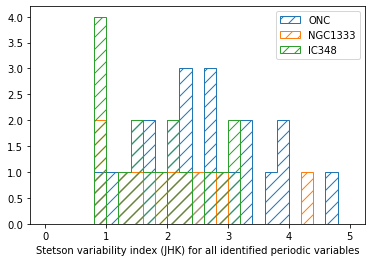

In [173]:

for i, good_sheet in enumerate([good_periods_onc, good_periods_ngc, good_periods_ic]):
    
    plt.hist(good_sheet['Stetson_JHK'], label=region_names[i], range=(0,5), bins=25, hatch='//', histtype='step')
    plt.legend()
    plt.xlabel("Stetson variability index (JHK) for all identified periodic variables")
